# Evaluation and Comparison

In diesem Notebook werden die Ergebnisse der Transfer und Non-Transfer Modelle vergleichen und die zentrale Frage wird beantwortet. Dabei geht es darum inwiefern Transfer Learning bei NLP Problemen sindvoll ist.

## Table of Contents

- [Imports](#-Imports)

- [Prediction Comparision](##-Prediction-comparision)

	- [Traditional Methods](##-Traditional-Methods)

	- [Deep Methods](##-Deep-Methods)


- [Compare Metrics](#-Compare-Metrics)

	- [Exkurs: Loss Evaluation](##-Exkurs-Compare-Loss-of-Deep-Learning-Models)	
	
	
- [Anhang](#-Anhang)


# Imports

In [3]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf

# Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# Visulization
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2023-07-02 17:40:39.308938: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Prediction comparision

Zunächst werden die abgespeicherten Vorhersagen gegenübergestellt. Und die Eigenschaften der verschiedenen Modelle erklärt.

In [7]:
# Load predictions

# Load the df
df_deep = pd.read_csv('results/results_deep.csv')

# Load the df
df_tra = pd.read_csv('results/results_tra.csv')

## Traditional Methods

Konkret gibt es bei den traditionellen Modellen die Varianten mit und ohne Transfer (`Traditional_DT`). Darüber hinaus kann bei den Traditionellen Transfer Modellen der Parameter für die Strenge der Gleichheit angepasst werden. Bei einem hohen Wert wie 7000000, werden nur die 2 best passensten Datensätze aus dem Pool der Quelldatensätze ausgewählt (`Transfer_7`). Bei einem hohen Wert wie 2000000, werden nur die 7 best passensten Datensätze aus dem Pool der Quelldatensätze ausgewählt (`Transfer_2`). Die verschiedenen Parameter sollen helfen die Auswirkung des Parameters zu verstehen und zu evaluieren. 

***Je nach dem wie viele zusätzliche Datensätze ausgewählt werden, ändert sich auch das Verhältnis zwischen den Ziel und Quelldaten und das Modell wird dem Modell ohne Transfer ähnlicher oder unähnlicher.***

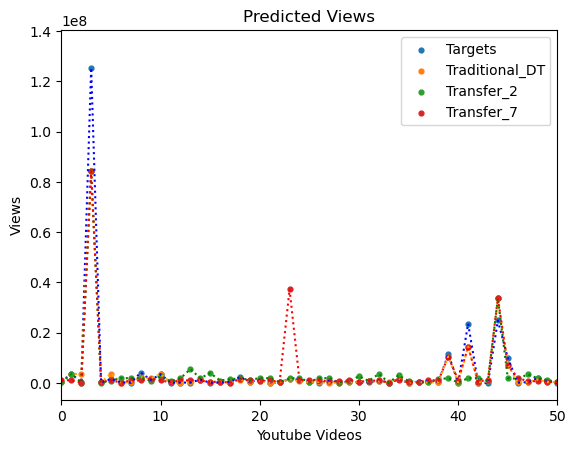

In [9]:
# Daten für den Scatter-Plot
data_tra = [
    (df_tra["target"], 'Targets', 'blue'),
    (df_tra["traditional"], 'Traditional_DT', 'orange'),
    (df_tra["tra_transfer_2"], 'Transfer_2', 'green'),
    (df_tra["tra_transfer_7"], 'Transfer_7', 'red')
]

# Schleife über die Daten
for i, (values, label, color) in enumerate(data_tra):
    plt.scatter(range(len(values)), values, label=label, s=12)
    plt.plot(range(len(values)), values, linestyle=':', color=color)

# Achsenbeschriftung und Titel
plt.xlabel('Youtube Videos')
plt.ylabel('Views')
plt.title('Predicted Views')
plt.xlim((0, 50))

# Legende anzeigen
plt.legend()

# Plot anzeigen
plt.show()

## Deep Methods

Bei den Deep Modellen gibt es bei den ebenfalls die Varianten mit und ohne Transfer (`Bench_Prediction`). Darüber hinaus gibt es ein Transfer Modell ohne Fine-tuning (`Transfer_Prediction`) und mehrere mit. Bei den Transfer Modellen mit Fine-tuning kann der Parameter für die Lernrate beim Fine-tuning angepasst werden. Bei einem hohen Wert wie 1e_3, werden werden die vortrainierten Gewichte stärker angepasst (`Fine_Prediction_1e_3`). Bei einem hohen Wert wie 1e_5, werden nur die gewichte nur geringfügig geupdatet (`Fine_Prediction_1e_5`). Die drei Fine-tuning Modelle sollen helfen die Auswirkung der Lernrate zu verstehen und zu evaluieren. 

***Je höher die Lernrate ist, desto ähnlicher ist das Modell dem Baselinemodell ohne Transfer, da der Einfluss des vortrainierten Modells schwindet.***

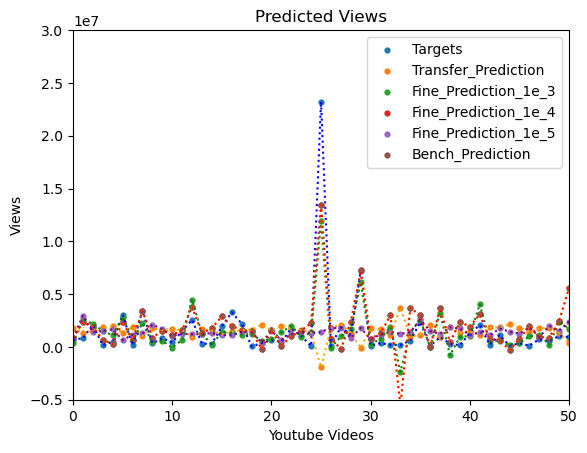

In [10]:
# Daten für den Scatter-Plot
data_deep = [
    (df_deep["targets"], 'Targets', 'blue'),
    (df_deep["deep_trasfer"], 'Transfer_Prediction', 'orange'),
    (df_deep["deep_fine_1e_3"], 'Fine_Prediction_1e_3', 'green'),
    (df_deep["deep_fine_1e_4"], 'Fine_Prediction_1e_4', 'yellow'),
    (df_deep["deep_fine_1e_5"], 'Fine_Prediction_1e_5', 'purple'),
    (df_deep["deep_base"], 'Bench_Prediction', 'red')
]

# Schleife über die Daten
for i, (values, label, color) in enumerate(data_deep):
    plt.scatter(range(len(values)), values, label=label, s=12)
    plt.plot(range(len(values)), values, linestyle=':', color=color)

# Achsenbeschriftung und Titel
plt.xlabel('Youtube Videos')
plt.ylabel('Views')
plt.title('Predicted Views')
plt.xlim((0, 50))
plt.ylim((-5000000, 30000000))

# Legende anzeigen
plt.legend()

# Plot anzeigen
plt.show()

# Compare Metrics

Im Folgenden werden die Metriken der Modelle genauer betrachtet, um einen wissenschaftlichen Vergleich zu ermöglichen.
Dazu gehören folgende Regressions Metriken.

- MSE - Mean Squared Error
- MAPE - Mean Absolut Percantage Error
- RSME - Root Squared Mean Error

und die Zeit die für das Modelltraining benötigt wurde.

- Excucution Time

In jedem Fall geht es darum diese Metriken zu minimieren, um den geringsten Error und die geringste Rechenzeit zu benötigen.

In [23]:
# Load metrics

# Load the df
deep_metrics = pd.read_csv('results/metrics_deep.csv')

# Load the df
tra_metrics = pd.read_csv('results/metrics_tra.csv')

metrics = pd.concat([deep_metrics,tra_metrics], axis=1).transpose().sort_index()

metrics

,0,1,2,3
deep_base,4.218222e+12,10.001443,2.053831e+06,146.240772
deep_fine_1e_3,2.169281e+12,6.775220,1.472848e+06,211.580532
deep_fine_1e_4,4.670075e+12,11.253568,2.161036e+06,210.871032
deep_fine_1e_5,1.634017e+13,8.943061,4.042298e+06,202.176270
deep_trasfer,2.574883e+13,15.008176,5.074331e+06,41.190525
tra_transfer_2,6.189956e+13,58.599699,7.867627e+06,6.197582
tra_transfer_7,1.012792e+14,25.645458,1.006376e+07,2.684898
traditional,5.475409e+12,5.178045,2.339959e+06,0.997787


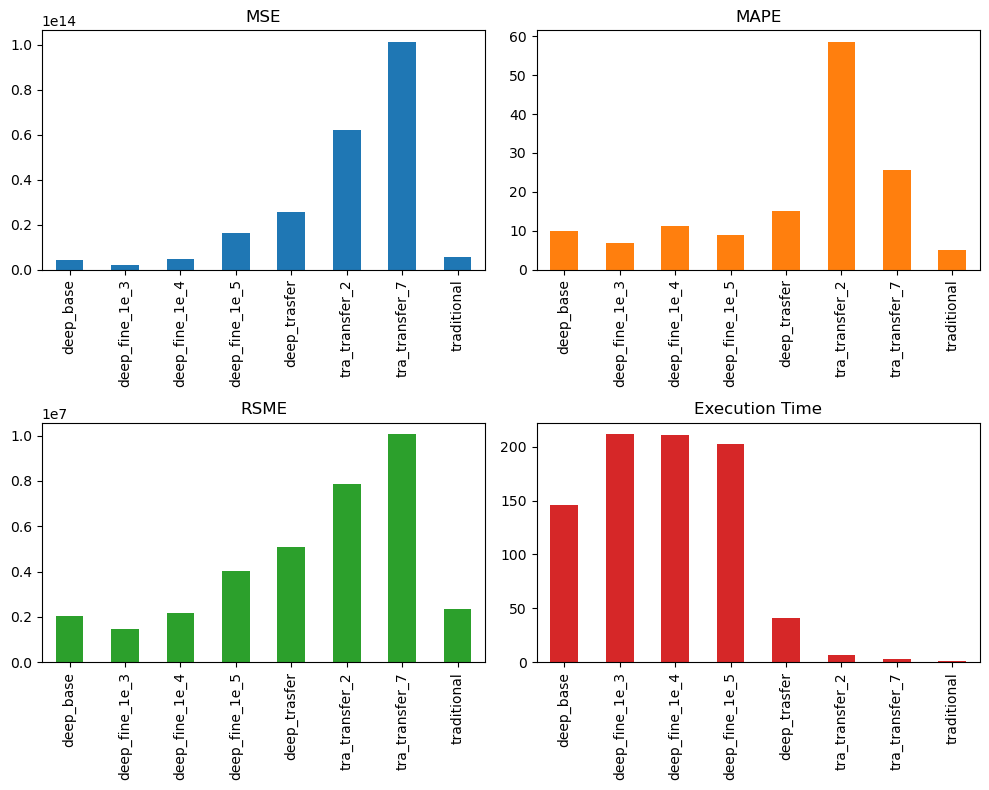

In [24]:
# Visulize Metrics

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

axes = axes.flatten()

names = ["MSE", "MAPE", "RSME", "Execution Time"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Iterate over the columns of the df
for i, column in enumerate(metrics.columns):

    ax = axes[i]
    metrics[column].plot(kind='bar', ax=ax, color=colors[i])
    ax.set_title(names[i])


plt.tight_layout()
plt.show()


### Evaluation Traditional vs. Deep Non-Transfer 

Vergleicht man die Traditionellen Techniken und die Deep Learning Techniken untereinander, schneidet `deep_base` gegenüber `traditional` im Hinblick auf MSE und RSME geringfügig besser ab. `traditional` benötigt dagegen deutlich weniger Rechenzeit und schneidet bei MAPE besser ab. Die Stärke von Traditionellen Modellen sollte also nie unterschätzt werden. Darüber hinaus ermöglicht es das Modell die Feature Importance auszulesen, um dadurch weitere Erkentnisse zu gewinnen.

### Evaluation Traditional vs. Deep Transfer

Gegenüber dem Traditionellen Transfer `tra_transfer` schneiden die Deep Learning Modelle `deep_transfer / deep_fine` deutlich besser ab. Jedoch brauchen diese eine längere Rechenzeit.

### Evaluation Traditional vs. Traditional Transfer 

Das Transfer Modell  `tra_transfer` schneidet gegenüber dem normalen Decision Tree deutlich `traditional` schlechter ab, sowohl in Leistung als auch in Rechenzeit. Mit erhöhung des Schwellwertes nähren sich die Werte dem normalen Modell ohne Transfer an, da der Transfer abnimmt

### Evaluation Deep vs. Deep Transfer 

Das Deep Transfer Learning Modell `deep_transfer` ohne Finetuning schneidet bei den Error-Metriken am schlechtesten ab, benötigt aber die wenigste Rechenzeit. Eine Erklärung dafür ist im folgenden Exkurs zum Loss angehängt. Abgestuft werden die Modelle mit zunehmender Lernrate besser, dauern aber dafür auch etwas länger `deep_fine_1e_3 / 4 / 5`. Das Baselinemodell `deep_base`braucht zur Berechnung weniger lange, ist dafür aber auch nur besser als das Modell mit der geringsten Lernrate `deep_fine_1e_5`.

### Best over all

Beachtet man sowohl die Performance als auch die Rechenzeit, schneidet das Deep Learning Modell ohne Transfer `deep_base` dich gefolgt von dem normale Decision Tree Modell `traditional` am besten ab.

### Fazit

Im Falle der Deep Learning Modelle kann Transfer Learning die Rechendauer verkürzen, wenn es sich um große Datenmengen handelt. Die Performance der Modelle kann durch die Erhöhung der Parameter verbessert werden, doch spricht dies in beiden Fällen für Modelle die weniger Transfer behinhalten und dem klassischen Modell ähnlicher werden. Dementsprechend kann festgehalten werden, dass der Transfer in diesem Zusammenhang nicht besonders gut funktioniert. Es sind genug Daten im Ziel-Datenset um Overfitting ohne sonstige Daten zu vermeiden. Allerdingts kann bei großen Datenmengen damit Rechenaufwand und die Rechendauer signifikant verringert werden, wenn im Vorfeld ein Modell traisinert wurde. Bei einer kleineren Datenmenge an Zieldaten wäre es ebenfalls sinvoll, die Daten mit Quelldaten zu ergänzen. Dabei sollte den Ergebnissen nach Deep Transfer verwendet werden. An dieser Stelle sollte jedoch auf klassische Methoden zurückgegriffen werden.

## Exkurs Compare Loss of Deep Learning Models

Vergleicht man des Loss zwischen der Baseline (links), die alleine auf Basis der Zieldaten trainiert ist, und der Transfer Learning Technik (rechts), fallen deutliche unterschiede auf. Während der Loss links stark abfällt, fällt dieser rechts langsamer. Die lässt sich damit erklären, dass der Loss rechts schon durch das Vortrainierte Modell recht niedrig anfängt. Während das Modell ohne Fine-tuning sich kaum verbessert, stagniert der Loss des Fine_Tuning Modells. Insgesammt ist der Loss des Modells ohne Transfer (links) geringer für Test als auch Validationset.

![Baseline](docs/base_loss.png) | ![Transfer and Fine_tuned Transfer](docs/deep_loss.png)

![Baseline](docs/pretrain_loss.png)

Für einen weiteren Vergleich der eben benannte Loss des Pretrained Modells.

# Anhang

Pretrained Modell:

![First Grid Search Results](docs/pretrain_model.png)

Fine Tuned Modell containing Pretrained: 

![First Grid Search Results](docs/fine_model.png)